In [1]:
pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install word2number

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=c32b6be6fcd47a98b43c5bc666a728cb4b3ca7037f5afa17cc7a87f5c51f140a
  Stored in directory: /root/.cache/pip/wheels/a0/4a/5b/d2f2df5c344ddbecb8bea759872c207ea91d93f57fb54e816e
Successfully built word2number


In [3]:
import torch as t
# from transformers import GPT2LMHeadModel, GPT2Tokenizer # pip install transformers
from transformers import GPTNeoForCausalLM, GPT2Tokenizer
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Model
import matplotlib.pyplot as plt
import time
import numpy as np
import sklearn
import pickle
import re
from num2words import num2words
from word2number import w2n
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import svm, datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
# num2words(3)

'three'

In [ ]:
# w2n.word_to_num("three")

In [ ]:
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)

Mon Apr 24 23:02:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    47W / 400W |      3MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
def create_dataset(i_start=0, i_end=50, operation=t.add):
  a = t.arange(start = i_start, end = i_end)
  b = t.arange(start = i_start, end = i_end)
  grid_a, grid_b = t.meshgrid(a, b, indexing = 'ij' )
  r_1 = t.reshape(grid_a, (-1,))
  r_2 = t.reshape(grid_b, (-1,))
  N = t.stack([r_1, r_2])
  y =  t.sum(N, dim=0)
  X = N.T
  return X, y.T

In [5]:
def load_LLM(default="gpt2-large", device='cpu'):
  # model_1 = 
  tokenizer = GPT2Tokenizer.from_pretrained(default)
  model = GPT2LMHeadModel.from_pretrained(default)
  # model.to(device)
  
  # def load_llm(default="gpt2-large", device='cpu'):
  
  # tokenizer = AutoTokenizer.from_pretrained(default)
  

  # model = GPT2LMHeadModel.from_pretrained(default)
  # model.to(device)

  # if tokenizer.pad_token is None:
  #   tokenizer.add_special_tokens({'pad_token': '[PAD]'})
  #   model.resize_token_embeddings(len(tokenizer))

  # return model, tokenizer

  return model, tokenizer
# default="EleutherAI/gpt-neo-1.3B",

In [6]:
def encode_problems(X, strategy='baseline'):
  

  # new = "two plus three eqaul to five, one plus two equal to three, "


  # new = "2 + 2 = 4, 4 + 4 = 8, 3 + 3 = 6, "

  new  = "2 + 3 = 5, 7 + 8 = 15, 9 + 10 = 19,  \n "
  

  
  output_strings = []


  for xi in X:
    if strategy == 'baseline': 
      # TODO:
       encode_string = str(xi[0].item()) +  " + "  + str(xi[1].item()) + " = "
    else:
      # TODO: encode_string =
      encode_string = new + str(xi[0].item()) + " + " +  str(xi[1].item())  + " = "
      # encode_string = "if x =" + str(xi[0].item()) + " and  y = " + str(xi[1].item()) + " and z = x + y, then z = "
    output_strings.append(encode_string) 
  return output_strings

In [7]:
def generate_text(model, tokenizer, prompts, verbose=True, device='cpu'):
  
  t0 = time.time()


  prompt_lenght = len(prompts)

  # print("prompt length is: " + str(prompt_lenght))


  batch_size = 50


  output_strings  = []

  i = 0
  
  # j = 0


  while i + batch_size <= prompt_lenght + 10:
     
    batch_prompt = prompts[i: i + batch_size]

    print("value of the i: " + str(i))

    # print(batch_prompt)

    # print("Input strings are: \n")

    # print(batch_prompt)

    encoded_inputs = tokenizer(batch_prompt, return_tensors="pt")


    with t.no_grad():
      #  outputs = model.generate(**encoded_inputs, do_sample=True, temperature=0.8, max_length=30, num_beams= 3, pad_token_id=50256)
       outputs = model.generate(**encoded_inputs, do_sample=True, temperature=0.8, max_new_tokens=5, num_beams= 3, pad_token_id=50256)
       

       output_strings = output_strings + tokenizer.batch_decode(outputs, skip_special_tokens=True)
      #  if j == 0:
        #  print("input strings after tokeniztion : \n")
        #  print(encoded_inputs)

        #  print("output of the generate function: \n")

        #  print(outputs)

        #  print("ouput strings after batch decoding: \n ")
        #  print(output_strings) 

        #  print(outputs )
        #  print(output_strings)

    i += batch_size
    # print("value of the i is : " + str(i))
    # j += 1

    # print(len(output_strings))





  

  
   
    # , pad_token_id=50256
    # outputs = model.generate(**encoded_inputs, do_sample=True, temperature=0.9, max_new_tokens=10, num_beams= 5)
  

  # print(encoded_inputs)
  # output_strings = " "
  
  if verbose:
    print("Time to generate text: ", time.time() - t0)
  
  return output_strings


  
"""(3 pts) Complete the prompt using the LLM.
1. Tokenize the prompts:
https://huggingface.co/docs/transformers/preprocessing
Put data and model on device to speed up computations
(Note that in real life, you'd use a dataloader to do this efficiently
in the background during training.)
2. Generate text using the model.
Turn off gradient tracking to save memory.
Determine the sampling hyper-parameters.
You may need to do it in batches, depending on memory constraints
3. Use the tokenizer to decode the output.
You will need to optionally print out the tokenization of the input and output strings for use in the write-up.
"""

# TODO: tokenize
# TODO: generate text, turn off gradient tracking # TODO: decode output, output_strings = ...

# TODO: print example tokenization for write-up
 # It took 4 minutes to do 25000 prompts on an NVIDIA 1080Ti.


"(3 pts) Complete the prompt using the LLM.\n1. Tokenize the prompts:\nhttps://huggingface.co/docs/transformers/preprocessing\nPut data and model on device to speed up computations\n(Note that in real life, you'd use a dataloader to do this efficiently\nin the background during training.)\n2. Generate text using the model.\nTurn off gradient tracking to save memory.\nDetermine the sampling hyper-parameters.\nYou may need to do it in batches, depending on memory constraints\n3. Use the tokenizer to decode the output.\nYou will need to optionally print out the tokenization of the input and output strings for use in the write-up.\n"

In [8]:
def decode_output(output_strings, strategy='baseline', verbose=True):
  y_hat = []

  pattern = r'\d+'

  for s in output_strings:
    try:
      substring_of_interest = re.search(pattern , s).group()
        # print(substring_of_interest)
      y_hat.append(int(substring_of_interest))
    except:
      y_hat.append(np.nan)

    # y = f(s) 
    # y_hat.append(y)
  return y_hat



  # s = len(input_strings)
  # i = 0
  # while i < s:
  #   input_string_size = len(input_strings[i])
  #   lm_output = output_strings[i][input_string_size:]
  #   print(output_strings[i])
  #   i += 1
    
    # pattern = r'^([\w\-]+)'
    # substring_of_interest = re.search(pattern, lm_output)
    # if substring_of_interest != None:
    #   print(substring_of_interest.group())

  # if strategy != "numbers_converted_to_words":
    
  # else:
  #   try:
  #       substring_of_interest = re.search(r'\b\w+\b', lm_output).group()
  #       print(substring_of_interest)
  #       y_hat.append(w2n.word_to_num(substring_of_interest))
  #   except:
  #     y_hat.append(np.nan)

  #   # i += 1

  # return y_hat



"""(1 pt) Decode the output strings into a list of integers. Use "t.nan"
for failed responses.
One suggestion is to split on non-numeric characters, then convert to int.
And use try/except to catch errors. """





'(1 pt) Decode the output strings into a list of integers. Use "t.nan"\nfor failed responses.\nOne suggestion is to split on non-numeric characters, then convert to int.\nAnd use try/except to catch errors. '

In [10]:
def analyze_results(X, y, y_hats, strategies):


  ##convert the tensors to numpy

  X = X.numpy()

  y = y.numpy()


  i = 0
  for li in y_hats:

    ## printing accuracy of the LLM
    y_llm = np.nan_to_num(np.array(li), nan=-1)


    print("Accuracy score for the " + strategies[i] + " strategy is : " + str(accuracy_score(y, y_llm)) + ". \n")
    
    
    
    ## displaying the scatter plots for baseline and new
    x1 = X[:, 0]
    x2 = X[:, 1]
    unique_x1 = np.unique(x1)
    unique_x2 = np.unique(x2)


    pad = len(y) - len(y_llm)

    i = 0

    while i < pad:
      y_llm = np.append(y_llm, -1)
      i += 1
  


    is_correct = (y_llm - y) == 0 

    is_correct[0] = True
    is_correct[1] = True
    is_correct[2] = True


    print("Displaying the scatter plot for " + strategies[i] + " strategy. \n \n")

    plt.scatter(x1[is_correct], x2[is_correct], c='green', marker='o', label='correct')
    plt.scatter(x1[~is_correct], x2[~is_correct], c='red', marker='o', label='incorrect')
    plt.xticks(range(len(unique_x1)), unique_x1) 
    plt.yticks(range(len(unique_x2)), unique_x2) 
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title("Scatter Plot for " +  strategies[i] + " strategy")
    plt.legend()
    plt.show()

    print("\n \n")

   
    
    



    



    i += 1


  i = 0
  for li in y_hats:

    # ## printing accuracy of the LLM
    y_llm = np.nan_to_num(np.array(li), nan=-1)

    
    x1 = X[:, 0]
    x2 = X[:, 1]
    unique_x1 = np.unique(x1)
    unique_x2 = np.unique(x2)
    


    is_correct = (y_llm - y) == 0 
   

    #for class balancing
    is_correct[0] = True

    is_correct[1] = True

    y_binary = is_correct.astype(int)


    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, stratify= y_binary, random_state=42)

    # Train SVM classifier
    # clf = svm.SVC(kernel='poly',C=0.1, degree = 4)
    # clf.fit(X_train, y_train)

    # Make predictions on test set
    # y_pred = clf.predict(X_test)

    model =  DecisionTreeClassifier()

    model.fit(X_train, y_train)


    y_p = model.predict(X_test)


    print("Classifier Accuracy score for the " + strategies[i] + " strategy is : " + str(accuracy_score(y_test, y_p)) + ". \n")





    fig, ax = plt.subplots(1,1, figsize=(8, 8))


    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    grid = np.vstack([xx.ravel(), yy.ravel()]).T

    y_pred = np.reshape(model.predict(grid), xx.shape)

    display = DecisionBoundaryDisplay(xx0=xx, xx1=yy, response=y_pred)

    display.plot(ax=ax)


    ax.scatter(x1[is_correct], x2[is_correct], c='green', marker='o', label='correct', s = 20)
    ax.scatter(x1[~is_correct], x2[~is_correct], c='red', marker='o', label='incorrect', s = 20)


    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_title('Classifier for ' + strategies[i] + " strategy")

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)








    





 
    

    # feature_1, feature_2 = np.meshgrid(np.linspace(dataset_range[0], dataset_range[1]),np.linspace(dataset_range[1], dataset_range[0]))

   


    
    # ax.scatter(output_df.loc[output_df[strategy+'_correct'], 'x1'], output_df.loc[output_df[strategy+'_correct'], 'x2'], label='correct', s=20)
    # ax.scatter(output_df.loc[~output_df[strategy+'_correct'], 'x1'], output_df.loc[~output_df[strategy+'_correct'], 'x2'], label='incorrect', s=20)

    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # title_str = strategy+ ' - GPT 2 Large Scatter Plot and Classifier contours'
    # ax.set_title(title_str)
    # ax.set_xlim(dataset_range[0]-1, dataset_range[1]+1)
    # ax.set_ylim(dataset_range[0]-1, dataset_range[1]+1)


    


    # # Use the classifier to predict the label of each point on the meshgrid
    # Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    # Z = Z.reshape(xx.shape)


    # plt.figure(figsize=(10, 8))
    # plt.scatter(X[:, 0], X[:, 1], c=y_binary, cmap=plt.cm.Set1, edgecolor='k')
    # plt.xlabel('Sepal length')
    # plt.ylabel('Sepal width')
    # plt.xlim(xx.min(), xx.max())
    # plt.ylim(yy.min(), yy.max())
    # plt.xticks(())
    # plt.yticks(())
    # plt.title('SVM with linear kernel')

    # # Use the contourf function from matplotlib to plot the decision boundary of the SVM
    # plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.5)

    # # Show the plot
    # plt.show()

    

    # Plot decision boundary
    # x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
    # Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    # Z = Z.reshape(xx1.shape)
    # plt.contourf(xx1, xx2, Z, alpha=0.4)
    # plt.scatter(X[:, 0], X[:, 1], c=y_llm , s=20, edgecolors='k')

    # plt.scatter(x1[is_correct], x2[is_correct], c='green', marker='o', label='correct')
    # plt.scatter(x1[~is_correct], x2[~is_correct], c='red', marker='o', label='incorrect')

    # plt.xlabel('x1')
    # plt.ylabel('x2')
    # plt.title('SVM Classifier Decision Boundary')
    # plt.legend()
    # plt.show()

    # Plot scatter points with different markers for correct and incorrect responses


    i += 1

    # if i == 1:
    #    break




value of the i: 0
value of the i: 50
value of the i: 100
value of the i: 150
value of the i: 200
value of the i: 250
value of the i: 300
value of the i: 350
value of the i: 400
value of the i: 450
value of the i: 500
value of the i: 550
value of the i: 600
value of the i: 650
value of the i: 700
value of the i: 750
value of the i: 800
value of the i: 850
Time to generate text:  256.6967763900757
value of the i: 0
value of the i: 50
value of the i: 100
value of the i: 150
value of the i: 200
value of the i: 250
value of the i: 300
value of the i: 350
value of the i: 400
value of the i: 450
value of the i: 500
value of the i: 550
value of the i: 600
value of the i: 650
value of the i: 700
value of the i: 750
value of the i: 800
value of the i: 850
Time to generate text:  702.7562212944031
Accuracy score for the baseline strategy is : 0.0077777777777777776. 

Displaying the scatter plot for baseline strategy. 
 



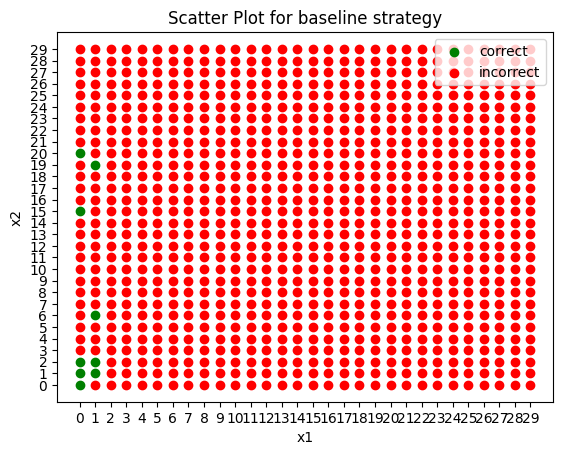


 

Accuracy score for the new strategy is : 0.02. 

Displaying the scatter plot for baseline strategy. 
 



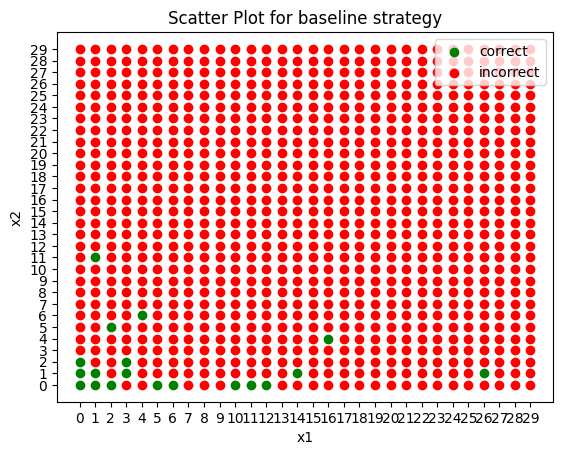


 

Classifier Accuracy score for the baseline strategy is : 0.9888888888888889. 

Classifier Accuracy score for the new strategy is : 0.9703703703703703. 



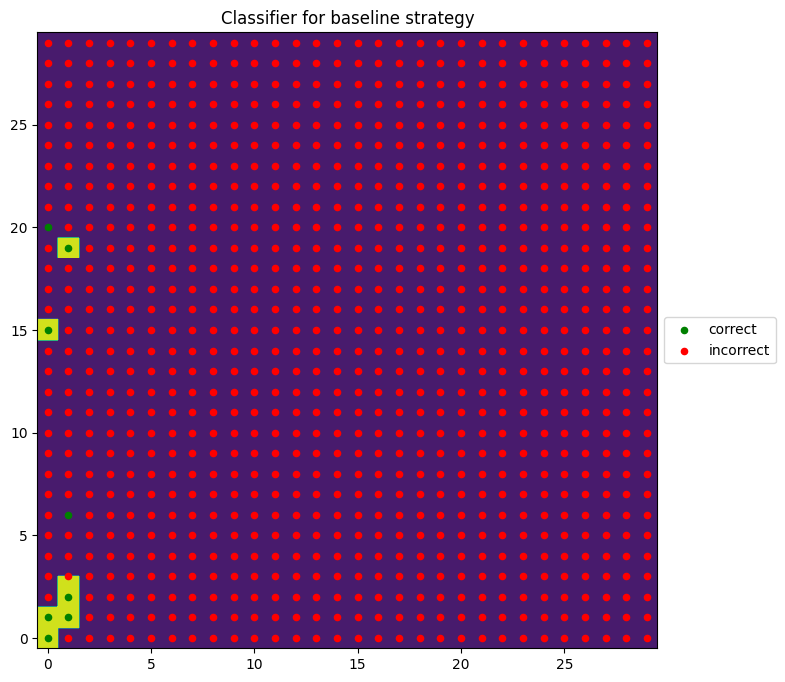

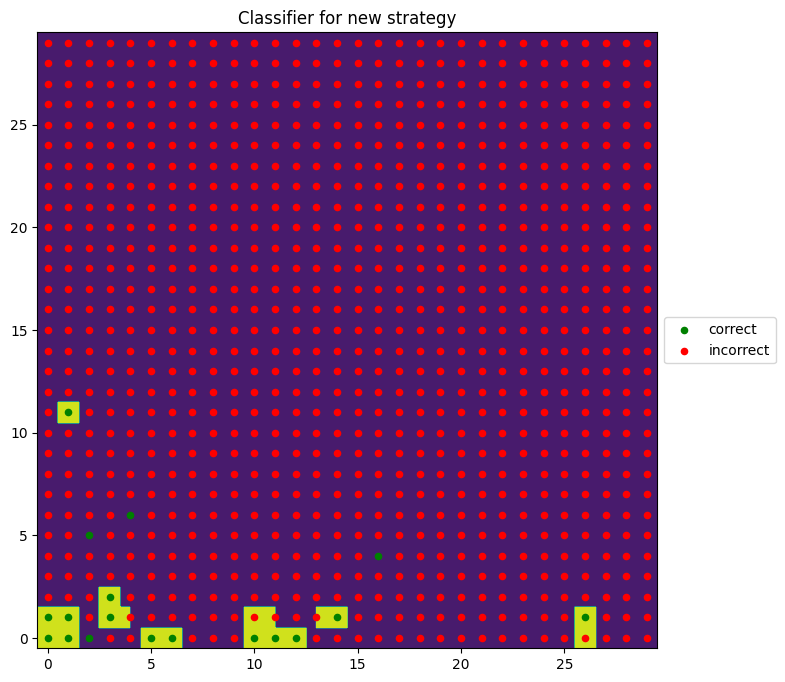

In [12]:
if __name__ == "__main__":
  device = t.device("cuda" if t.cuda.is_available() else "cpu") # Use GPU if available
  device = t.device('mps') if t.backends.mps.is_available() else device # UseApple's Metal backend if available



  X, y = create_dataset(0, 30)
  model, tokenizer = load_LLM(device=device)
  y_hats = [] # list of lists of predicted answers, y_hat, for each strategy 
  strategies = ['baseline', 'new']
  # strategies = ['new']
  for strategy in strategies:
    # print("Encode strings function outputs:     \n")

    # print('input strings for the ' + strategy + ' strategy:  \n')


    input_strings = encode_problems(X, strategy=strategy)

    # print(input_strings)


    # print("Generate text functions outputs for the " + strategy + " strategy:   " )


    output_strings = generate_text(model, tokenizer, input_strings, device=device)

    # print("\n")

    output_strings = [out_s[len(in_s):] for in_s, out_s in zip(input_strings, output_strings)]

    # print("Results of the Decoding output for the " + strategy + "strategy:   \n" )

    # print(decode_output(output_strings, strategy=strategy))


    y_hats.append(decode_output(output_strings, strategy=strategy)) 

  analyze_results(X, y, y_hats, strategies)